* Python code replication of:
" https://www.kaggle.com/janniskueck/pm2-notebook-jannis "
* Created by: Alexander Quispe and Anzony Quispe 

This notebook contains an example for teaching.

# Testing the Convergence Hypothesis

## Introduction

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.


The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

## Data analysis


We consider the data set GrowthData which is included in the package *hdm*. First, let us load the data set to get familiar with the data.

In [1]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random

In [2]:
# I downloaded the data that the author used
growth_read = pyreadr.read_r("C:/Users/edfra/OneDrive/Documentos/GitHub/ECO224/Labs/data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
list(growth)

['Outcome',
 'intercept',
 'gdpsh465',
 'bmp1l',
 'freeop',
 'freetar',
 'h65',
 'hm65',
 'hf65',
 'p65',
 'pm65',
 'pf65',
 's65',
 'sm65',
 'sf65',
 'fert65',
 'mort65',
 'lifee065',
 'gpop1',
 'fert1',
 'mort1',
 'invsh41',
 'geetot1',
 'geerec1',
 'gde1',
 'govwb1',
 'govsh41',
 'gvxdxe41',
 'high65',
 'highm65',
 'highf65',
 'highc65',
 'highcm65',
 'highcf65',
 'human65',
 'humanm65',
 'humanf65',
 'hyr65',
 'hyrm65',
 'hyrf65',
 'no65',
 'nom65',
 'nof65',
 'pinstab1',
 'pop65',
 'worker65',
 'pop1565',
 'pop6565',
 'sec65',
 'secm65',
 'secf65',
 'secc65',
 'seccm65',
 'seccf65',
 'syr65',
 'syrm65',
 'syrf65',
 'teapri65',
 'teasec65',
 'ex1',
 'im1',
 'xr65',
 'tot1']

We determine the dimension of our data set.

In [3]:
growth.shape

(90, 63)

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
# We create the main variables
y = growth['Outcome']
X = growth.drop('Outcome', 1)

In [6]:
# OLS regression
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3.607
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           0.000200
Time:                        13:13:40   Log-Likelihood:                 238.24
No. Observations:                  90   AIC:                            -352.5
Df Residuals:                      28   BIC:                            -197.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2472      0.785      0.315      0.7

In [7]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

## Summarize OLS results

In [8]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci
table_1[0,3] = upper_ci    


table_1_pandas = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_1_pandas.index = [ "OLS" ]
table_1_html = table_1_pandas.to_html()
table_1_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Estimator</th>\n      <th>Std. Error</th>\n      <th>lower bound CI</th>\n      <th>upper bound CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>OLS</th>\n      <td>-0.009378</td>\n      <td>0.029888</td>\n      <td>-0.0706</td>\n      <td>0.051844</td>\n    </tr>\n  </tbody>\n</table>'

<!-- html table generated in R 3.6.3 by xtable 1.8-4 package -->
<!-- Tue Jan 19 10:23:32 2021 -->
<table border=1>
<tr> <th>  </th> <th> estimator </th> <th> standard error </th> <th> lower bound CI </th> <th> upper bound CI </th>  </tr>
  <tr> <td align="right"> OLS </td> <td align="right"> -0.009 </td> <td align="right"> 0.030 </td> <td align="right"> -0.071 </td> <td align="right"> 0.052 </td> </tr>
   </table>

Least squares provides a rather noisy estimate (high standard error) of the
speed of convergence, and does not allow us to answer the question
about the convergence hypothesis since the confidence interval includes zero.

In [9]:
# Create main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], 1 )
D = growth['gdpsh465']

In [10]:
W.shape

(90, 60)

In [11]:
Y.shape

(90,)

In [12]:
D.shape

(90,)

## Double LASSO using cross Validation (Using Sklearn)

Now, we are going to use sample splitting approach:

In [13]:
from sklearn.model_selection import train_test_split
D_train, D_test, Y_train, Y_test, W_train, W_test = train_test_split(D, Y, W, test_size = 0.30)
W_train.shape

(63, 60)

In [14]:
D_train.shape

(63,)

In [15]:
Y_train.shape

(63,)

In [16]:
#rom sklearn import model_selection
#from sklearn.model_selection import cross_val_score

#kfold = model_selection.KFold(n_splits=10)
#lr = LogisticRegression()
#scoring = 'accuracy'
#results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
#print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
#results

#### First of all, let's use the $ \alpha $ = 0.00077 because it is the value that get answers pretty similar in comparison with R

In [17]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y_train - lasso_model.fit(W_train,Y_train).predict(W_train)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_train - lasso_model.fit(W_train,D_train).predict(W_train)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020233881385821207, tolerance: 1.7378308849653384e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.831628631674787, tolerance: 0.005197957054585986
  model = cd_fast.enet_coordinate_descent(


In [18]:
# from sklearn import linear_model

# # Seat values for Lasso
# lasso_model = linear_model.Lasso( alpha = 0.00077 )
# r_Y = Y - lasso_model.fit( W, Y ).predict( W )
# r_Y = r_Y.rename('r_Y')

# # Part. out d
# r_D = D - lasso_model.fit( W, D ).predict( W )
# r_D = r_D.rename('r_D')

# # Regress residuales
# partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

# # output: estimated regression coefficient corresponding to the target regressor
# est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# # output: std. error
# std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# # output: 95% confidence interval
# lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
# upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [19]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

Coefficient for D via sample splitting using lasso -0.03554293383696565


In [20]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_train = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_train = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_train = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_train = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [21]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [23]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
scores = cross_val_score(mymodel, W_train, D_train ,Y_train)
scores

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=1     0.100473
82    0.052759
8     0.033551
41    0.016775
7     0.020978
        ...   
29    0.076233
71    0.065491
65    0.066598
3     0.064089
54   -0.015680
Name: Outcome, Length: 63, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([-0.2431131 ,  0.34573183, -1.4292078 , -0.41308104, -1.0991819 ])

In [24]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y_test - lasso_model.fit(W_test,Y_test ).predict(W_test)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_test - lasso_model.fit(W_test,D_test).predict(W_test)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9993757186923264e-05, tolerance: 6.050252656825445e-06
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34891651606769614, tolerance: 0.0019497693778818168
  model = cd_fast.enet_coordinate_descent(


In [25]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [27]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
pred = cross_val_score(mymodel, W_test, D_test,Y_test)
pred

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=80    0.038095
23    0.109699
43    0.066629
32    0.116990
89    0.040642
86    0.034096
4     0.027930
69    0.094618
21    0.133982
17    0.029738
13    0.078293
45   -0.003020
5     0.046407
14    0.112912
68    0.054751
16    0.036391
72    0.021247
60   -0.034045
25    0.062250
18   -0.056644
37    0.094851
36    0.065838
24    0.015990
57    0.014256
2     0.067051
40    0.039024
48   -0.048712
Name: Outcome, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ -0.64482456, -64.5561906 ,  -2.40662103,  -3.57287847,
        -3.42781672])

In [28]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

Coefficient for D via sample splitting using lasso -0.0912734927128476


In [29]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_test = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_test = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_test = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_test = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

#### Secondly, let's use the $ \alpha $ = 0.1  in order to know how $\beta$ changes in comparison when we use $ \alpha $ = 0.00077

In [30]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.1 )
r_Y = Y_train - lasso_model.fit(W_train,Y_train).predict(W_train)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_train - lasso_model.fit(W_train,D_train).predict(W_train)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [31]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

Coefficient for D via sample splitting using lasso 0.013689315929058702


In [32]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_train_1 = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_train_1 = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_train_1 = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_train_1 = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [33]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [35]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
scores = cross_val_score(mymodel, W_train, D_train ,Y_train)
scores

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=1     0.100473
82    0.052759
8     0.033551
41    0.016775
7     0.020978
        ...   
29    0.076233
71    0.065491
65    0.066598
3     0.064089
54   -0.015680
Name: Outcome, Length: 63, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([-0.2431131 ,  0.34573183, -1.4292078 , -0.41308104, -1.0991819 ])

In [36]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.1 )
r_Y = Y_test - lasso_model.fit(W_test,Y_test ).predict(W_test)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_test - lasso_model.fit(W_test,D_test).predict(W_test)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [37]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [39]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
pred = cross_val_score(mymodel, W_test, D_test,Y_test)
pred

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=80    0.038095
23    0.109699
43    0.066629
32    0.116990
89    0.040642
86    0.034096
4     0.027930
69    0.094618
21    0.133982
17    0.029738
13    0.078293
45   -0.003020
5     0.046407
14    0.112912
68    0.054751
16    0.036391
72    0.021247
60   -0.034045
25    0.062250
18   -0.056644
37    0.094851
36    0.065838
24    0.015990
57    0.014256
2     0.067051
40    0.039024
48   -0.048712
Name: Outcome, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ -0.64482456, -64.5561906 ,  -2.40662103,  -3.57287847,
        -3.42781672])

In [40]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

Coefficient for D via sample splitting using lasso -0.04095076538232917


In [41]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_test_1 = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_test_1 = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_test_1 = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_test_1 = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

#### Thridly, let's use the $ \alpha $ = 0.8 in order to know how $\beta$ changes in comparison when we use $ \alpha $ =0.00077 and the other $ \alpha $ = 0.1

In [42]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y_train - lasso_model.fit(W_train,Y_train).predict(W_train)
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_train - lasso_model.fit(W_train,D_train).predict(W_train)
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020233881385821207, tolerance: 1.7378308849653384e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.831628631674787, tolerance: 0.005197957054585986
  model = cd_fast.enet_coordinate_descent(


In [43]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

Coefficient for D via sample splitting using lasso -0.03554293383696565


In [44]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_train_2 = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_train_2 = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_train_2 = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_train_2 = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [45]:
r_Y = pd.DataFrame(r_Y)
r_D = pd.DataFrame(r_D)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(r_Y, r_D)

In [47]:
# K - fold CV
# Importing cross_val score function

from sklearn.model_selection import cross_val_score

# 5-fold CV
pred = cross_val_score(mymodel, W_test, D_test,Y_test)
pred

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=80    0.038095
23    0.109699
43    0.066629
32    0.116990
89    0.040642
86    0.034096
4     0.027930
69    0.094618
21    0.133982
17    0.029738
13    0.078293
45   -0.003020
5     0.046407
14    0.112912
68    0.054751
16    0.036391
72    0.021247
60   -0.034045
25    0.062250
18   -0.056644
37    0.094851
36    0.065838
24    0.015990
57    0.014256
2     0.067051
40    0.039024
48   -0.048712
Name: Outcome, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ -0.64482456, -64.5561906 ,  -2.40662103,  -3.57287847,
        -3.42781672])

In [48]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via sample splitting using lasso {partial_lasso_est}" )

Coefficient for D via sample splitting using lasso -0.03554293383696565


In [49]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_test_2 = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_test_2 = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_test_2 = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_test_2 = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

## Summary LASSO results


Finally, let us have a look at the results.

In [50]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_lasso_train
table_2[0,1] = std_lasso_train
table_2[0,2] = lower_ci_lasso_train
table_2[0,3] = upper_ci_lasso_train


table_2_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2_pandas.index = [ "LASSO TRAIN (alpha=0.00077)" ]
table_2_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.01034


In [51]:
table_3 = table_1_pandas.append(table_2_pandas)
table_3

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340


In [52]:
table_4 = table_2 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso_test
table_4[0,1] = std_lasso_test
table_4[0,2] = lower_ci_lasso_test
table_4[0,3] = upper_ci_lasso_test

table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_4_pandas.index = [ "LASSO TEST (alpha= 0.00077)" ]
table_4_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736


In [53]:
table_5 = table_3.append(table_4_pandas)
table_5

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736


In [54]:
table_6 = np.zeros( (1, 4) )

table_6[0,0] = est_lasso_train_1
table_6[0,1] = std_lasso_train_1
table_6[0,2] = lower_ci_lasso_train_1
table_6[0,3] = upper_ci_lasso_train_1


table_6_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_6_pandas.index = [ "LASSO TRAIN ( alpha =0.1)" ]
table_6_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736


In [55]:
table_7 = table_5.append(table_6_pandas)
table_7

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736


In [56]:
table_8 = table_2 = np.zeros( (1, 4) )

table_8[0,0] = est_lasso_test_1
table_8[0,1] = std_lasso_test_1
table_8[0,2] = lower_ci_lasso_test_1
table_8[0,3] = upper_ci_lasso_test_1

table_8_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_8_pandas.index = [ "LASSO TEST ( alpha= 0.1 )" ]
table_8_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO TEST ( alpha= 0.1 ),-0.091273,0.040154,-0.173811,-0.008736


In [57]:
table_9 = table_7.append(table_8_pandas)
table_9

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736
LASSO TEST ( alpha= 0.1 ),-0.091273,0.040154,-0.173811,-0.008736


In [58]:
table_10 = np.zeros( (1, 4) )

table_10[0,0] = est_lasso_train_2
table_10[0,1] = std_lasso_train_2
table_10[0,2] = lower_ci_lasso_train_2
table_10[0,3] = upper_ci_lasso_train_2


table_10_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_10_pandas.index = [ "LASSO TRAIN (alpha=0.8)" ]
table_10_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO TRAIN (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296


In [59]:
table_11 = table_9.append(table_10_pandas)
table_11

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736
LASSO TEST ( alpha= 0.1 ),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296


In [60]:
table_12 = np.zeros( (1, 4) )

table_12[0,0] = est_lasso_test_2
table_12[0,1] = std_lasso_test_2
table_12[0,2] = lower_ci_lasso_test_2
table_12[0,3] = upper_ci_lasso_test_2


table_12_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_12_pandas.index = [ "LASSO TEST (alpha=0.8)" ]
table_12_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO TEST (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296


In [61]:
table_13 = table_11.append(table_12_pandas)
table_13

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736
LASSO TEST ( alpha= 0.1 ),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296
LASSO TEST (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296


In [62]:
table_13_html = table_13.to_html()
print(table_13_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Estimator</th>
      <th>Std. Error</th>
      <th>lower bound CI</th>
      <th>upper bound CI</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>OLS</th>
      <td>-0.009378</td>
      <td>0.029888</td>
      <td>-0.070600</td>
      <td>0.051844</td>
    </tr>
    <tr>
      <th>LASSO TRAIN (alpha=0.00077)</th>
      <td>-0.035543</td>
      <td>0.022953</td>
      <td>-0.081426</td>
      <td>0.010340</td>
    </tr>
    <tr>
      <th>LASSO TEST (alpha= 0.00077)</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736</td>
    </tr>
    <tr>
      <th>LASSO TRAIN ( alpha =0.1)</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736</td>
    </tr>
    <tr>
      <th>LASSO TEST ( alpha= 0.1 )</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736

The least square method provides a rather noisy estimate of the speed of convergence. We can not answer the question if poor countries grow faster than rich countries. The least square method does not work when the ratio $p/n$ is large.

First of all, these are the $\beta$'s for Lasso when $\alpha$ = 0.00077.

On the one hand, for  sample splitting via Lasso provides a more precise estimate. 
The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.14\%,1.03\%]$ only includes negative numbers. This empirical evidence does NOT support the convergence hypothesis.

On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

Secondly, these are the $\beta$'s for Lasso when $\alpha$ = 0.1.

On the one hand, for  sample splitting via Lasso provides a more precise estimate. 
The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

First of all, these are the $\beta$'s for Lasso when $\alpha$ = 0.8

On the one hand, for  sample splitting via Lasso provides a more precise estimate. 
The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.06\%,-0.12\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.06\%,-0.12\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Estimator</th>
      <th>Std. Error</th>
      <th>lower bound CI</th>
      <th>upper bound CI</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>OLS</th>
      <td>-0.009378</td>
      <td>0.029888</td>
      <td>-0.070600</td>
      <td>0.051844</td>
    </tr>
    <tr>
      <th>LASSO TRAIN (alpha=0.00077)</th>
      <td>-0.035543</td>
      <td>0.022953</td>
      <td>-0.081426</td>
      <td>0.010340</td>
    </tr>
    <tr>
      <th>LASSO TEST (alpha= 0.00077)</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736</td>
    </tr>
    <tr>
      <th>LASSO TRAIN ( alpha =0.1)</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736</td>
    </tr>
    <tr>
      <th>LASSO TEST ( alpha= 0.1 )</th>
      <td>-0.091273</td>
      <td>0.040154</td>
      <td>-0.173811</td>
      <td>-0.008736</td>
    </tr>
    <tr>
      <th>LASSO TRAIN (alpha=0.8)</th>
      <td>-0.040951</td>
      <td>0.019292</td>
      <td>-0.080605</td>
      <td>-0.001296</td>
    </tr>
    <tr>
      <th>LASSO TEST (alpha=0.8)</th>
      <td>-0.040951</td>
      <td>0.019292</td>
      <td>-0.080605</td>
      <td>-0.001296</td>
    </tr>
  </tbody>
</table>

## Double LASSO using theoretical Lambda (HDM package)

In [78]:
res_Y = hdmpy.rlasso( W, Y, post=True ).est['residuals']
res_D = hdmpy.rlasso( W, D, post=True ).est['residuals']

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [79]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              12.92
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                    0.000533
Time:                        13:27:52   Log-Likelihood:                          152.68
No. Observations:                  90   AIC:                                     -303.4
Df Residuals:                      89   BIC:                                     -300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [80]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_HDM = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_HDM = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_HDM = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_HDM = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [81]:
table_3 = np.zeros( (1, 4) )

table_3[0,0] = est_lasso_HDM
table_3[0,1] = std_lasso_HDM
table_3[0,2] = lower_ci_lasso_HDM 
table_3[0,3] = upper_ci_lasso_HDM


table_3_pandas = pd.DataFrame( table_3, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_3_pandas.index = [ "LASSO_HDM" ]
table_3_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_HDM,-0.049811,0.013858,-0.077347,-0.022276


Using HDM package via lasso provides estimation with $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-7.73\%,-2.22\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

## Double LASSO using method = "partialling out"

In [82]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")
lasso_direct

{'alpha': -0.04981144483733834,
 'se': array([0.01539133]),
 't': array([-3.23633167]),
 'pval': array([0.00121077]),
 'coefficients': -0.04981144483733834,
 'coefficient': -0.04981144483733834,
 'coefficients_reg':                     0
 (Intercept)  0.058101
 x0          -0.075565
 x1           0.000000
 x2           0.000000
 x3           0.000000
 ...               ...
 x55          0.000000
 x56          0.000000
 x57          0.000000
 x58          0.000000
 x59          0.000000
 
 [61 rows x 1 columns],
 'selection_index': array([[ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
     

In [83]:
est_lasso_part_out = lasso_direct["coefficients"]
std_lasso_part_out = lasso_direct["se"]
lower_ci_lasso_part_out = est_lasso - 1.96*std_lasso
upper_ci_lasso_part_out = est_lasso + 1.96*std_lasso

In [84]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso_part_out
table_4[0,1] = std_lasso_part_out
table_4[0,2] = lower_ci_lasso_part_out
table_4[0,3] = upper_ci_lasso_part_out


table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4_pandas.index = [ "LASSO_partialling_out" ]
table_4_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_partialling_out,-0.049811,0.015391,-0.080532,0.009446


The partialling-out approach via lasso does not allow us to answer the question about the convergence hypothesis since the confidence interval includes zero.

In [85]:
table_14 = table_13.append(table_3_pandas)
table_14

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736
LASSO TEST ( alpha= 0.1 ),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296
LASSO TEST (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296
LASSO_HDM,-0.049811,0.013858,-0.077347,-0.022276


In [86]:
table_15 = table_14.append(table_4_pandas)
table_15

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736
LASSO TEST ( alpha= 0.1 ),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296
LASSO TEST (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296
LASSO_HDM,-0.049811,0.013858,-0.077347,-0.022276
LASSO_partialling_out,-0.049811,0.015391,-0.080532,0.009446


In [87]:
coef_df = pd.DataFrame(table_15) 
coef_df

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736
LASSO TEST ( alpha= 0.1 ),-0.091273,0.040154,-0.173811,-0.008736
LASSO TRAIN (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296
LASSO TEST (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296
LASSO_HDM,-0.049811,0.013858,-0.077347,-0.022276
LASSO_partialling_out,-0.049811,0.015391,-0.080532,0.009446


In [88]:
variables = list(coef_df.index.values)
variables

['OLS',
 'LASSO TRAIN (alpha=0.00077)',
 'LASSO TEST (alpha= 0.00077)',
 'LASSO TRAIN ( alpha =0.1)',
 'LASSO TEST ( alpha= 0.1 )',
 'LASSO TRAIN (alpha=0.8)',
 'LASSO TEST (alpha=0.8)',
 'LASSO_HDM',
 'LASSO_partialling_out']

In [89]:
coef_df['variables'] = variables
coef_df

,Estimator,Std. Error,lower bound CI,upper bound CI,variables
OLS,-0.009378,0.029888,-0.070600,0.051844,OLS
LASSO TRAIN (alpha=0.00077),-0.035543,0.022953,-0.081426,0.010340,LASSO TRAIN (alpha=0.00077)
LASSO TEST (alpha= 0.00077),-0.091273,0.040154,-0.173811,-0.008736,LASSO TEST (alpha= 0.00077)
LASSO TRAIN ( alpha =0.1),-0.091273,0.040154,-0.173811,-0.008736,LASSO TRAIN ( alpha =0.1)
LASSO TEST ( alpha= 0.1 ),-0.091273,0.040154,-0.173811,-0.008736,LASSO TEST ( alpha= 0.1 )
LASSO TRAIN (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296,LASSO TRAIN (alpha=0.8)
LASSO TEST (alpha=0.8),-0.040951,0.019292,-0.080605,-0.001296,LASSO TEST (alpha=0.8)
LASSO_HDM,-0.049811,0.013858,-0.077347,-0.022276,LASSO_HDM
LASSO_partialling_out,-0.049811,0.015391,-0.080532,0.009446,LASSO_partialling_out


In [90]:
errors = coef_df['Estimator'] - coef_df['lower bound CI']

In [91]:
coef_df['errors'] = errors

<ipython-input-92-6a909340e248>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


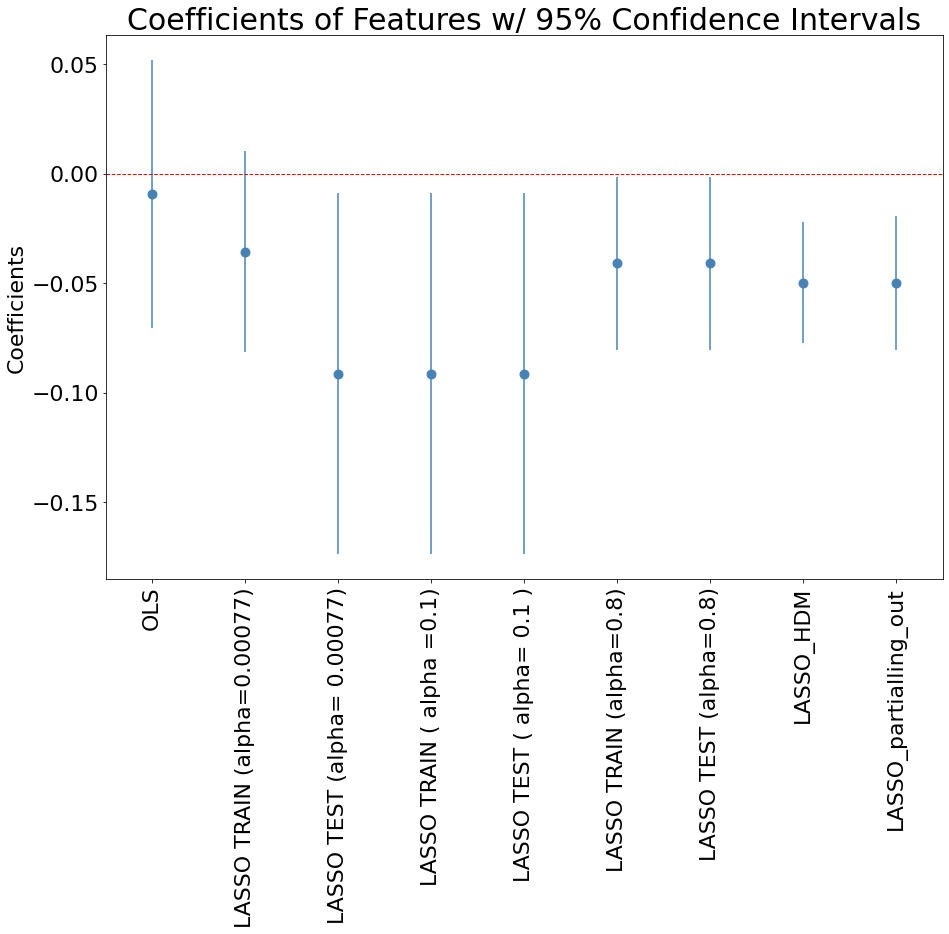

In [92]:
# Define figure, axes, and plot
fig, ax = plt.subplots(figsize=(15, 10))
    
# Error bars for 95% confidence interval
# Can increase capsize to add whiskers
coef_df.plot(x='variables', y='Estimator', kind='bar',
            ax=ax, color='none', fontsize=22, 
            ecolor='steelblue',capsize=0,
            yerr='errors', legend=False)
    
# Set title & labels
plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
ax.set_ylabel('Coefficients',fontsize=22)
ax.set_xlabel('',fontsize=22)
    
# Coefficients
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
         marker='o', s=80, 
         y=coef_df['Estimator'], color='steelblue')
    
# Line to define zero on the y-axis
ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
plt.show()

#### This graph shows the comparison of the coefficients in the different model approaches: OLS, Lasso (with $\alpha$ = 0.00077), Lasso (with $\alpha$ = 0.1), Lasso (with $\alpha$ = 0.8), Lasso with the HDM package and the Lasso by the "partialling out" method. These are the following inferences:


- First of all, Ordinal Least squares provides a rather noisy estimate (high standard error) of the speed of convergence, and does not allow us to answer the question about the convergence hypothesis since the confidence interval includes zero.

- Secondly, on the one hand, for  sample splitting via Lasso provides a more precise estimate. 

- The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.14\%,1.03\%]$ only includes negative numbers. This empirical evidence does NOT support the convergence hypothesis.

- On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- Thirdly, these are the $\beta$'s for Lasso when $\alpha$ = 0.1. On the one hand, for  sample splitting via Lasso provides a more precise estimate. 

- The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-17.38\%,-0.87\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- Fourthly, these are the $\beta$'s for Lasso when $\alpha$ = 0.8

- One the one hand, The Lasso (Train sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.06\%,-0.12\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- On the other hand, The Lasso (Test sample) based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.06\%,-0.12\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- Fifthly, The Lasso via HDM package based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-7.73\%,-2.22\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

- Sixthly, The Lasso via partialling out method based point estimate is $-5\%$ and the $95\%$ confidence interval for the (annual) rate of convergence $[-8.05\%,-0.94\%]$ only includes negative numbers. This empirical evidence does support the convergence hypothesis.

In conclusion, only lasso in almost all the methods used give us significant results (only not in the train sample with $\alpha$=0.00077). In other words, according to this empirical research we can say that poor countries grow faster than rich countries.